In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# Regresión Logística

## Titanic
Vamos a crear un modelo que prediga la probabilidad de supervivencia de los pasajeros

https://www.kaggle.com/c/titanic/data?select=train.csv

0. Importar data de training y testing. Agregarle a la tabla de testing la columna survived proveniente de la tabla gender_submission

In [43]:
test = pd.read_csv("test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [45]:
train = pd.read_csv("train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
gender = pd.read_csv("gender_submission.csv")
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [49]:
test = test.merge(
    gender,
    left_on = "PassengerId",
    right_on = "PassengerId",
    how = 'left'
)

1. Buscar columnas con valores nulos y cantidad de nulos en cada una. Fijarse el porcentaje de los datos nulos que representan sobre el total.

In [52]:
nulos = train.isna().sum()
filas = train.shape[0]

nulos/filas*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [54]:
nulos = test.isna().sum()
filas = test.shape[0]

nulos/filas*100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
Survived        0.000000
dtype: float64

2. En base al resultado anterior. Cuales columnas consideran que tienen sentido completar y cuales se deberían eliminar? Eliminar la que corresponda de la tabla de test y de train.

In [57]:
# Elimino Cabin
train.drop(columns = 'Cabin', inplace = True, axis = 1)
test.drop(columns = 'Cabin', inplace = True, axis = 1)

In [59]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,1


In [61]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


3. Completar valores nulos con el criterio que considres correcto en cada una de las columnas (que tengan sentido completar). Esto debe hacerse tanto en la tabla de training como la de testing (con el mismo criterio en ambas).

   Verificar como se distribuyen los valores de cada columna con un gráfico previamente para tener más herramientas en la decisión

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

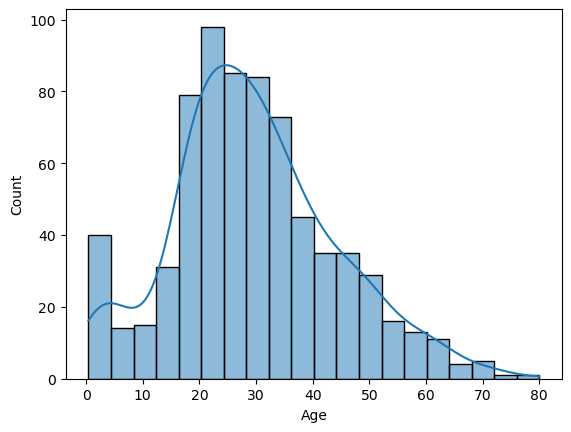

In [64]:
sns.histplot(x = train["Age"], kde = True)

In [66]:
# Completo Age
train.Age.fillna(round(train.Age.median(),0), inplace=True)

In [68]:
test.Age.fillna(round(test.Age.median(),0), inplace=True)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Embarked', ylabel='Count'>

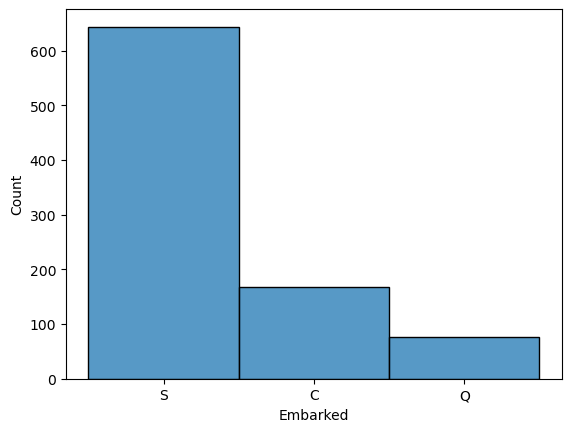

In [70]:
sns.histplot(x = train.Embarked)

In [72]:
# Compleo Embarked
train["Embarked"].fillna(
    train.Embarked.mode()[0],
    inplace = True
)

In [74]:
test["Embarked"].fillna(
    test.Embarked.mode()[0],
    inplace = True
)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Fare', ylabel='Count'>

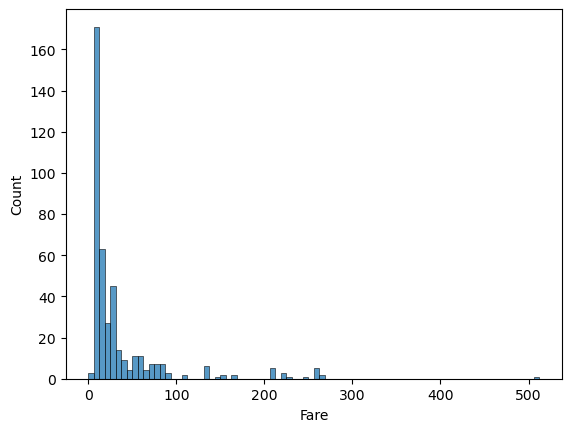

In [76]:
sns.histplot(x = test.Fare)

In [78]:
test.loc[test.Fare.isnull(),:]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S,0


In [80]:
promedio_tercera_clase = test.loc[test["Pclass"] == 3, "Fare"].mean()

In [82]:
# Completo fare
test["Fare"].fillna(
    promedio_tercera_clase,
    inplace = True
)

In [84]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [86]:
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survived       0
dtype: int64

4. Realizar análisis exploratorio. Graficar las personas que sobrevivieron por:
    - Clase (Pclass)
    - Sexo (Sex)
    - Costo de boleto (Fare)

AttributeError: 'numpy.int64' object has no attribute 'startswith'

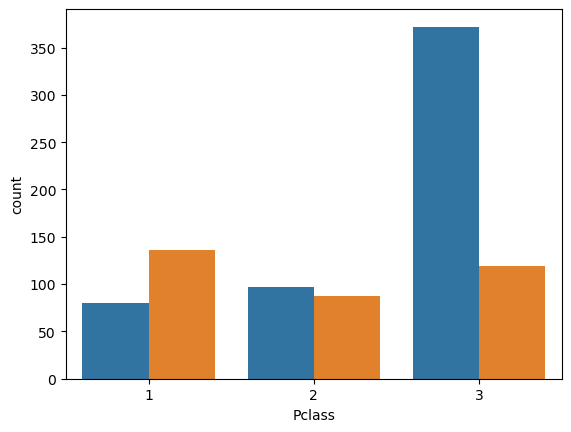

In [91]:
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.grid(True)
plt.title('Cantidad de personas que sobrevivieron por Clase')
plt.xlabel('Clase')
plt.ylabel('Cantidad de personas')
plt.show()

In [ ]:
sns.countplot(x='Sex', hue='Survived', data=train)
plt.grid(True)
plt.title('Cantidad de personas que sobrevivieron por sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad de personas')
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(x='Fare', hue='Survived', data=train, bins=30, multiple='dodge')
plt.grid(True)
plt.title('Cantidad de personas que sobrevivieron por Costo de boleto (Fare)')
plt.xlabel('Costo de boleto (Fare)')
plt.ylabel('Cantidad de personas')
plt.show()

5. Verificar columnas del DataFrame e identificar sobre cuales se deberían generar variables dummies.
   Generar columnas de dummies sobre "Pclass","Embarked" y "Sex". Aplicar cambios en training y testing

In [163]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'IsMinor'],
      dtype='object')

In [165]:
for i in train.columns:
    print(f"{i}: {type(train[i][0])}")

Survived: <class 'numpy.int64'>
Pclass: <class 'numpy.int64'>
Sex: <class 'str'>
Age: <class 'numpy.float64'>
SibSp: <class 'numpy.int64'>
Parch: <class 'numpy.int64'>
Fare: <class 'numpy.float64'>
Embarked: <class 'str'>
IsMinor: <class 'numpy.int32'>


In [167]:
train = pd.get_dummies(
    train,
    columns = ["Pclass","Embarked", "Sex"],
    drop_first = True
)

In [169]:
train.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'IsMinor', 'Pclass_2',
       'Pclass_3', 'Embarked_Q', 'Embarked_S', 'Sex_male'],
      dtype='object')

In [171]:
test = pd.get_dummies(
    test,
    columns = ["Pclass","Embarked", "Sex"],
    drop_first = True
)

KeyError: "None of [Index(['Pclass', 'Embarked', 'Sex'], dtype='object')] are in the [columns]"

In [173]:
test.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'Survived', 'Pclass_2', 'Pclass_3',
       'Embarked_Q', 'Embarked_S', 'Sex_male', 'IsMinor'],
      dtype='object')

6. Eliminar columnas del dataset que considere que no suman al modelo. Hacerlo en testing y training

In [176]:
train.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'IsMinor', 'Pclass_2',
       'Pclass_3', 'Embarked_Q', 'Embarked_S', 'Sex_male'],
      dtype='object')

In [178]:
len(test.columns)

11

In [180]:
train.drop(columns = 'Name', inplace = True, axis = 1)

KeyError: "['Name'] not found in axis"

In [ ]:
test.drop(columns =  'Name', inplace = True, axis = 1)

In [ ]:
train.drop(columns = 'Ticket', inplace = True, axis = 1)

In [ ]:
test.drop(columns =  'Ticket', inplace = True, axis = 1)

In [ ]:
train.drop(columns =  'PassengerId', inplace = True, axis = 1)

In [ ]:
test.drop(columns =  'PassengerId', inplace = True, axis = 1)

In [187]:
train.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'IsMinor', 'Pclass_2',
       'Pclass_3', 'Embarked_Q', 'Embarked_S', 'Sex_male'],
      dtype='object')

In [189]:
len(test.columns)

11

7. Agregar una columna llamada "IsMinor" que sea 1 en caso de tener 16 años o menos y 0 en caso contrario. Hacerlo para testing y training

In [203]:
# For X_train_final
X_train_final = test.assign(IsMinor=train['Age'].apply(lambda x: 1 if x <= 16 else 0))

# For X_test_final
X_test_final = test.assign(IsMinor=train['Age'].apply(lambda x: 1 if x <= 16 else 0))

In [205]:
X_train_final.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'Survived', 'Pclass_2', 'Pclass_3',
       'Embarked_Q', 'Embarked_S', 'Sex_male', 'IsMinor'],
      dtype='object')

In [207]:
X_test_final.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'Survived', 'Pclass_2', 'Pclass_3',
       'Embarked_Q', 'Embarked_S', 'Sex_male', 'IsMinor'],
      dtype='object')

8. Ajustar modelo considerando todas las variables del dataset de testing.

In [218]:
from sklearn import neighbors

In [249]:
X_train = train.loc[:,train.columns != 'Survived']
y_train = train.loc[:,'Survived']

In [253]:
#usamos KNN para tereminar los vecinos más cercanos
k = 5
modelo = neighbors.KNeighborsClassifier(n_neighbors=k)
modelo.fit(X_train,y_train)

KNeighborsClassifier()

9. Validar el modelo con datos de testing, agregar dos columnas a test_data:
    * predicción: valor 0 o 1
    * probabilidad_prediccion: valor de la probabilidad devuelta por el modelo

In [256]:
X_test = test.loc[:, test.columns != "Survived"]
y_real = test["Survived"]

In [258]:
test["y_pred"] = modelo.predict(X_test)
y_pred_prob = modelo.predict_proba(X_test)[:,1]

ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


10. Calcular matriz de confusión

In [161]:
matriz_confusion = confusion_matrix(y_test, y_pred)
matriz_confusion

array([[253,  13],
       [ 16, 136]], dtype=int64)

In [167]:
TN = matriz_confusion[0][0]
TP = matriz_confusion[1][1]
FN = matriz_confusion[1][0]
FP = matriz_confusion[0][1]

11. Calcular Accuracy

In [171]:
(TN + TP) / (TN + TP + FN + FP)

0.930622009569378

12. Calcular sensibilidad

In [174]:
TP / (TP + FN)

0.8947368421052632

13. Calcular especificidad

In [177]:
TN / (TN + FP)

0.9511278195488722

14. Graficar curva de ROC

In [180]:
especificidad_inv, sensibilidad, threshold = roc_curve(y_test, y_pred_proba)

<Axes: >

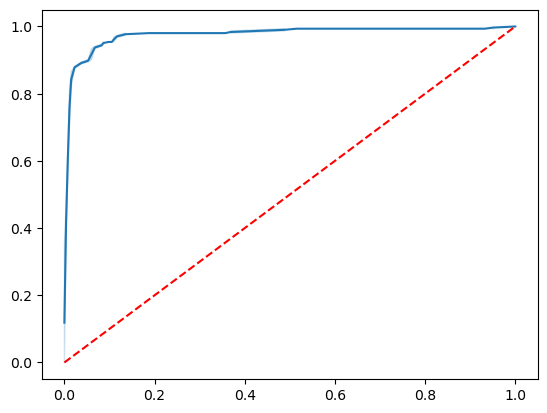

In [183]:
recta_x = [i * 0.01 for i in range(101)]
recta_y = recta_x
sns.lineplot(x = especificidad_inv, y = sensibilidad)
sns.lineplot(x = recta_x, y = recta_x, ls = "--", color = "red")

15. Calcular valor de área bajo la curva de ROC

In [186]:
roc_auc_score(y_test, y_pred_proba)

0.9762316976652157